# Assignment 9 - Clustering

- Allan Simonsen
- Jean-Poul Leth-Møller
- Nina Lisakowski


## 1. Setup

In [1]:
#The following libraries and modules are needed.

# import pandas for structuring the data
import pandas as pd
from pandas.plotting import scatter_matrix


# numpy for splitting the data
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Import of data

#### 2.1 Ticker dataset

In [2]:
ticker_df = pd.read_csv('../data/stock_market_data/nasdaq/csv/NVDA.csv', delimiter=",")

In [3]:
ticker_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,22-01-1999,0.388021,0.437500,271468800,0.488281,0.410156,0.376886
1,25-01-1999,0.410156,0.442708,51048000,0.458333,0.453125,0.416370
2,26-01-1999,0.411458,0.458333,34320000,0.467448,0.417969,0.384065
3,27-01-1999,0.395833,0.419271,24436800,0.429688,0.416667,0.382869
4,28-01-1999,0.412760,0.416667,22752000,0.419271,0.415365,0.381673


In [4]:
ticker_df.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close
5848,19-04-2022,213.139999,217.199997,51278100,223.729996,221.979996,221.979996
5849,20-04-2022,212.000000,225.169998,46897400,226.699997,214.820007,214.820007
5850,21-04-2022,200.000000,217.089996,65620900,223.919998,201.830002,201.830002
5851,22-04-2022,195.000000,203.029999,62356500,204.860001,195.149994,195.149994
5852,25-04-2022,190.960007,192.020004,53252181,198.460007,194.479996,194.479996


In [5]:
ticker_df.shape

(5853, 7)

In [6]:
ticker_df.columns

Index(['Date', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close'], dtype='object')

In [7]:
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5853 non-null   object 
 1   Low             5853 non-null   float64
 2   Open            5853 non-null   float64
 3   Volume          5853 non-null   int64  
 4   High            5853 non-null   float64
 5   Close           5853 non-null   float64
 6   Adjusted Close  5853 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 320.2+ KB


In [8]:
ticker_df.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,5853.000000,5853.000000,5.853000e+03,5853.000000,5853.000000,5853.000000
mean,24.494390,24.988110,6.172271e+07,25.435754,24.976619,24.740922
std,51.379501,52.551047,4.486185e+07,53.560622,52.482870,52.525937
min,0.333333,0.348958,1.968000e+06,0.355469,0.341146,0.313474
25%,2.502604,2.582500,3.382080e+07,2.667500,2.591146,2.380965
50%,3.931667,4.002500,5.160040e+07,4.075000,3.997500,3.715069
75%,11.800000,11.902500,7.566240e+07,11.982500,11.890000,11.699721
max,320.359985,335.170013,9.230856e+08,346.470001,333.760010,333.760010


#### 2.2 News dataset

In [9]:
news_df = pd.read_csv('../data/news/analyst_ratings_processed.csv', delimiter=",")

In [10]:
news_df.head()

,Unnamed: 0,title,date,stock
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,2.0,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


In [11]:
news_df.tail()

,Unnamed: 0,title,date,stock
1400464,1413844.0,Top Narrow Based Indexes For August 29,2011-08-29 10:41:00-04:00,ZX
1400465,1413845.0,Recap: Wednesday's Top Percentage Gainers and ...,2011-06-22 16:44:00-04:00,ZX
1400466,1413846.0,UPDATE: Oppenheimer Color on China Zenix Auto ...,2011-06-21 08:26:00-04:00,ZX
1400467,1413847.0,Oppenheimer Initiates China Zenix At Outperfor...,2011-06-21 05:59:00-04:00,ZX
1400468,1413848.0,China Zenix Auto International Opens For Tradi...,2011-05-12 09:36:00-04:00,ZX


In [12]:
news_df.shape

(1400469, 4)

In [13]:
news_df.columns

Index(['Unnamed: 0', 'title', 'date', 'stock'], dtype='object')

In [14]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400469 entries, 0 to 1400468
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1399180 non-null  float64
 1   title       1400469 non-null  object 
 2   date        1399180 non-null  object 
 3   stock       1397891 non-null  object 
dtypes: float64(1), object(3)
memory usage: 42.7+ MB


In [15]:
news_df.describe()

,Unnamed: 0
count,1.399180e+06
mean,7.095738e+05
std,4.077075e+05
min,0.000000e+00
25%,3.547798e+05
50%,7.114675e+05
75%,1.062727e+06
max,1.413848e+06


In [16]:
news_df['date'] = news_df['date'].str[:10]

In [17]:
news_df['date']

0          2020-06-05
1          2020-06-03
2          2020-05-26
3          2020-05-22
4          2020-05-22
              ...    
1400464    2011-08-29
1400465    2011-06-22
1400466    2011-06-21
1400467    2011-06-21
1400468    2011-05-12
Name: date, Length: 1400469, dtype: object

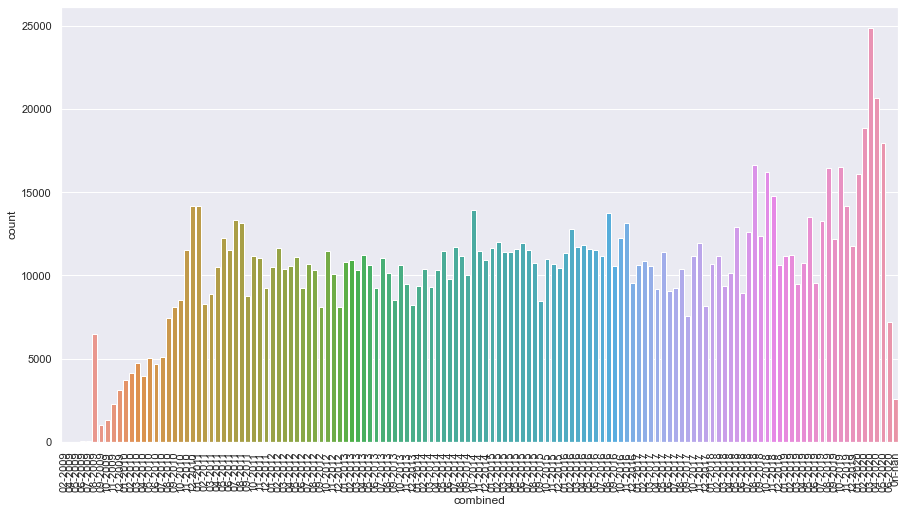

In [18]:
news_df['date_time'] = pd.to_datetime(news_df['date'], errors='coerce')
news_df = news_df.sort_values(by = 'date_time')
news_df['combined'] = news_df['date_time'].dt.month.astype(str).str[:-2].str.zfill(2) + '-' +  news_df['date_time'].dt.year.astype(str).str[:4]


sns.set(rc = {'figure.figsize':(15,8)})
chart = sns.countplot(x='combined', data=news_df)
chart.tick_params(axis = 'x', rotation = 90)

In [19]:
news_df['combined'].unique()

array(['02-2009', '04-2009', '05-2009', '06-2009', '07-2009', '08-2009',
       '09-2009', '10-2009', '11-2009', '12-2009', '01-2010', '02-2010',
       '03-2010', '04-2010', '05-2010', '06-2010', '07-2010', '08-2010',
       '09-2010', '10-2010', '11-2010', '12-2010', '01-2011', '02-2011',
       '03-2011', '04-2011', '05-2011', '06-2011', '07-2011', '08-2011',
       '09-2011', '10-2011', '11-2011', '12-2011', '01-2012', '02-2012',
       '03-2012', '04-2012', '05-2012', '06-2012', '07-2012', '08-2012',
       '09-2012', '10-2012', '11-2012', '12-2012', '01-2013', '02-2013',
       '03-2013', '04-2013', '05-2013', '06-2013', '07-2013', '08-2013',
       '09-2013', '10-2013', '11-2013', '12-2013', '01-2014', '02-2014',
       '03-2014', '04-2014', '05-2014', '06-2014', '07-2014', '08-2014',
       '09-2014', '10-2014', '11-2014', '12-2014', '01-2015', '02-2015',
       '03-2015', '04-2015', '05-2015', '06-2015', '07-2015', '08-2015',
       '09-2015', '10-2015', '11-2015', '12-2015', 

In [36]:
news_df = news_df[~(news_df['date_time'] < '2010-06-01')]

In [37]:
news_df['combined'].unique()

array(['06-2010', '07-2010', '08-2010', '09-2010', '10-2010', '11-2010',
       '12-2010', '01-2011', '02-2011', '03-2011', '04-2011', '05-2011',
       '06-2011', '07-2011', '08-2011', '09-2011', '10-2011', '11-2011',
       '12-2011', '01-2012', '02-2012', '03-2012', '04-2012', '05-2012',
       '06-2012', '07-2012', '08-2012', '09-2012', '10-2012', '11-2012',
       '12-2012', '01-2013', '02-2013', '03-2013', '04-2013', '05-2013',
       '06-2013', '07-2013', '08-2013', '09-2013', '10-2013', '11-2013',
       '12-2013', '01-2014', '02-2014', '03-2014', '04-2014', '05-2014',
       '06-2014', '07-2014', '08-2014', '09-2014', '10-2014', '11-2014',
       '12-2014', '01-2015', '02-2015', '03-2015', '04-2015', '05-2015',
       '06-2015', '07-2015', '08-2015', '09-2015', '10-2015', '11-2015',
       '12-2015', '01-2016', '02-2016', '03-2016', '04-2016', '05-2016',
       '06-2016', '07-2016', '08-2016', '09-2016', '10-2016', '11-2016',
       '12-2016', '01-2017', '02-2017', '03-2017', 

In [38]:
news_df.isnull().sum()

Unnamed: 0    1289
title            0
date          1289
stock         2578
date_time     2578
combined         0
dtype: int64

In [39]:
# Removing Unnamed column (index)
news_df = news_df.iloc[:,1:]
news_df.head()

,title,date,stock,date_time,combined
913404,State Street May Win From Finance Overhaul,2010-06-01,NTRS,2010-06-01,06-2010
1113055,Stancorp Financial Presents Strong Performance...,2010-06-01,SFG,2010-06-01,06-2010
82264,Panic In The Drilling Stocks,2010-06-01,APC,2010-06-01,06-2010
48054,A Look Under The Hood: PowerShares Private Equ...,2010-06-01,AINV,2010-06-01,06-2010
1273754,Puts Sold on UBS,2010-06-01,UBS,2010-06-01,06-2010


In [108]:
news_df.dropna(inplace=True)

In [109]:
news_df.isnull().sum()

title    0
date     0
stock    0
dtype: int64

In [85]:
# Searching for news regarding nvidia
nvidia = news_df.loc[news_df['stock'] == 'NVDA']
nvidia

,Unnamed: 0,title,date,stock,date_time,combined
920236,932188.0,Nvidia Goes Negative (NVDA),2011-03-03,NVDA,2011-03-03,03-2011
920234,932186.0,Goldman Sachs Gives Color On Semiconductors (N...,2011-03-07,NVDA,2011-03-07,03-2011
920235,932187.0,Auriga Still Not Sure Where Reality Lies For N...,2011-03-07,NVDA,2011-03-07,03-2011
920230,932182.0,"JPM Says ""Our Bearish View on the Company's Ex...",2011-03-08,NVDA,2011-03-08,03-2011
920231,932183.0,"Benzinga's Top Upgrades (NVDA, ANF, MIPS, WFT)",2011-03-08,NVDA,2011-03-08,03-2011
...,...,...,...,...,...,...
917104,929045.0,Morning Market Stats in 5 Minutes,2020-06-08,NVDA,2020-06-08,06-2020
917101,929042.0,Shares of several technology companies are tra...,2020-06-09,NVDA,2020-06-09,06-2020
917098,929039.0,Shares of several technology companies are tra...,2020-06-10,NVDA,2020-06-10,06-2020
917099,929040.0,Afternoon Market Stats in 5 Minutes,2020-06-10,NVDA,2020-06-10,06-2020


In [86]:
nvidia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3133 entries, 920236 to 917100
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3133 non-null   float64       
 1   title       3133 non-null   object        
 2   date        3133 non-null   object        
 3   stock       3133 non-null   object        
 4   date_time   3133 non-null   datetime64[ns]
 5   combined    3133 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 171.3+ KB


## 2.3 Combining dataset

In [ ]:
## Visualizing dataset